<a href="https://colab.research.google.com/github/Logithpandiyan/food-delivery-time-prediction/blob/main/notebooks/food_delivery_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv(r"/content/Food_Delivery_Times.csv")
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [82]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [83]:
x=df["Courier_Experience_yrs"].mean()
x

np.float64(4.579381443298969)

In [84]:
df['Courier_Experience_yrs'].fillna(x,inplace=True)
print(df.to_string())

     Order_ID  Distance_km Weather Traffic_Level Time_of_Day Vehicle_Type  Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min
0         522         7.93   Windy           Low   Afternoon      Scooter                    12                1.000000                 43
1         738        16.42   Clear        Medium     Evening         Bike                    20                2.000000                 84
2         741         9.52   Foggy           Low       Night      Scooter                    28                1.000000                 59
3         661         7.44   Rainy        Medium   Afternoon      Scooter                     5                1.000000                 37
4         412        19.03   Clear           Low     Morning         Bike                    16                5.000000                 68
5         679        19.40   Clear           Low     Evening      Scooter                     8                9.000000                 57
6         627         9.52 

In [85]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


In [86]:
df.dropna(axis=1,inplace=True)

In [87]:
df.isnull().sum()
df

,Order_ID,Distance_km,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Scooter,12,1.0,43
1,738,16.42,Bike,20,2.0,84
2,741,9.52,Scooter,28,1.0,59
3,661,7.44,Scooter,5,1.0,37
4,412,19.03,Bike,16,5.0,68
...,...,...,...,...,...,...
995,107,8.50,Car,13,3.0,54
996,271,16.28,Scooter,8,9.0,71
997,861,15.62,Scooter,26,2.0,81
998,436,14.17,Bike,8,0.0,55


In [88]:
ob1=LabelEncoder()
df['Vehicle_Type']=ob1.fit_transform(df['Vehicle_Type'])
df

,Order_ID,Distance_km,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,2,12,1.0,43
1,738,16.42,0,20,2.0,84
2,741,9.52,2,28,1.0,59
3,661,7.44,2,5,1.0,37
4,412,19.03,0,16,5.0,68
...,...,...,...,...,...,...
995,107,8.50,1,13,3.0,54
996,271,16.28,2,8,9.0,71
997,861,15.62,2,26,2.0,81
998,436,14.17,0,8,0.0,55


In [89]:
x=df.drop('Delivery_Time_min',axis=1)
x
y=df['Delivery_Time_min']
y

,Delivery_Time_min
0,43
1,84
2,59
3,37
4,68
...,...
995,54
996,71
997,81
998,55


In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [91]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [92]:
print(model.score(xtest,ytest)*100)
print(model.score(xtrain,ytrain)*100)

76.48264005867964
69.06539234025688


In [93]:
ypred=model.predict(xtest)
ypred

array([41.52247308, 67.51611142, 35.09578202, 45.24697255, 86.67951607,
       34.36931553, 64.8740379 , 32.69393129, 27.63874297, 68.83571144,
       70.76418964, 66.33913645, 33.98121844, 68.6963559 , 90.65930587,
       87.30593542, 33.41697444, 71.05466527, 43.7528951 , 61.58406885,
       84.67722394, 29.71408836, 76.8343004 , 76.77380412, 55.39722094,
       31.74364827, 76.36785741, 27.11916711, 50.66831382, 62.19444972,
       59.10755537, 24.62498478, 62.01065595, 40.32606091, 74.78743756,
       21.22779479, 69.70646636, 55.88601926, 48.55474097, 70.94633329,
       76.344605  , 38.83712517, 75.70646646, 67.87590164, 34.73439579,
       23.05672373, 84.47768995, 90.41377578, 81.3683471 , 33.9506397 ,
       56.49505501, 63.97755249, 44.87914299, 72.96641141, 51.50498069,
       55.93256994, 70.9982964 , 72.98302603, 63.03540408, 88.7981791 ,
       49.85444889, 41.35335059, 41.54545589, 51.08978653, 48.35018439,
       59.67216864, 69.6821045 , 87.59311513, 63.73898135, 50.38

In [94]:
model1=RandomForestRegressor()
model1.fit(xtrain,ytrain)

RandomForestRegressor()

In [95]:
print(model1.score(xtest,ytest)*100)
print(model1.score(xtrain,ytrain)*100)

72.54609818059137
94.71163261380482


In [96]:
model2=DecisionTreeRegressor()
model2.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [97]:
print(model2.score(xtest,ytest)*100)
print(model2.score(xtrain,ytrain)*100)

50.6203978395639
100.0


In [98]:
r2=r2_score(ytest,ypred)
print((r2)*100)

76.48264005867964


In [103]:
model3=KNeighborsRegressor(n_neighbors=5)
model3.fit(xtrain,ytrain)

KNeighborsRegressor()

In [104]:
print(model3.score(xtest,ytest)*100)
print(model3.score(xtrain,ytrain)*100)

42.62249073457015
62.38007960430486


In [105]:
data=pd.DataFrame({"Train_Accuracy":[69.06539234025688,100.0,94.71163261380482,62.38007960430486],"Test_Accuracy":[76.48264005867964,50.6203978395639,72.54609818059137,42.62249073457015]},index=['linear','Decision','random forest','k-neighbour'])
data

,Train_Accuracy,Test_Accuracy
linear,69.065392,76.482640
Decision,100.000000,50.620398
random forest,94.711633,72.546098
k-neighbour,62.380080,42.622491


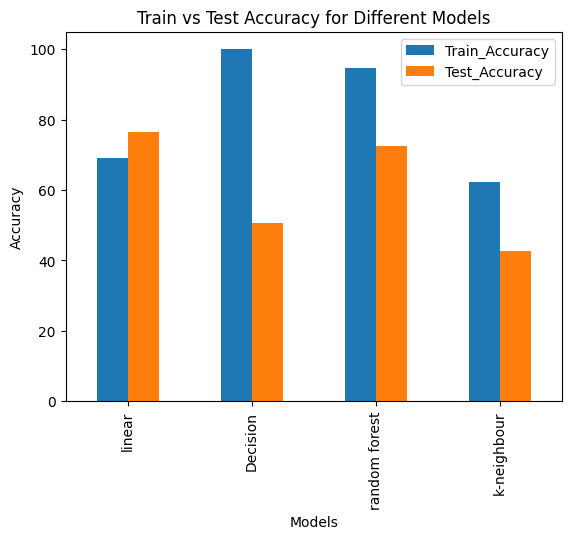

In [106]:
data.plot(kind='bar')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Models')
plt.show()